In [27]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv("/Users/rushikaarvapalli/Desktop/Projects/Flight Price/archive/Clean_Dataset.csv")

In [ ]:
# ✅ Step 3: Explore Data
print(df.head())  # First 5 rows
print(df.info())  # Check data types & missing values
print(df.describe())  # Summary stats

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Coun

In [ ]:
# Step 4: Preprocessing
# Drop unnecessary columns
df.drop(columns=["flight", "departure_time", "arrival_time"], inplace=True)

# Define categorical & numerical features
categorical_features = ["airline", "source_city", "destination_city", "class", "stops"]
numerical_features = ["duration", "days_left"]

# Define column transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [ ]:
# Step 5: Train-Test Split
X = df.drop(columns=["price"])  # Features
y = df["price"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the transformer on training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Convert labels to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:

# Step 6: Define Deep Learning Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/Users/rushikaarvapalli/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 4s 488us/step - loss: 180696848.0000 - mae: 7316.0903 - val_loss: 29402060.0000 - val_mae: 3171.5210
Epoch 2/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 4s 480us/step - loss: 35469924.0000 - mae: 3527.4172 - val_loss: 28780070.0000 - val_mae: 3115.9080
Epoch 3/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 4s 491us/step - loss: 35526888.0000 - mae: 3498.7537 - val_loss: 28498390.0000 - val_mae: 3085.6394
Epoch 4/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 4s 495us/step - loss: 34537068.0000 - mae: 3449.9119 - val_loss: 27363354.0000 - val_mae: 3056.3975
Epoch 5/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 4s 504us/step - loss: 33717456.0000 - mae: 3407.8562 - val_loss: 25760818.0000 - val_mae: 2957.5566
Epoch 6/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 4s 497us/step - loss: 32008892.0000 - mae: 3313.3994 - val_loss: 25176354.0000 - val_mae: 2911.3674
Epoch 7/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 4s 496us/step - loss: 31708666.0000 - mae: 3320.9377 - val_loss: 24421920.0000 - val_mae: 2895.1101
Epoch

In [ ]:
# Step 8: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")


1876/1876 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step - loss: 49755984.0000 - mae: 4096.0986
Test MAE: 4078.138671875


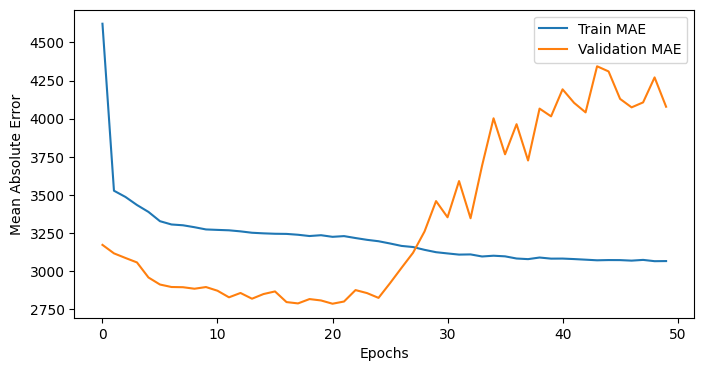

In [ ]:
#Step 9: Visualize Training Performance
plt.figure(figsize=(8, 4))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()


In [ ]:
#Step 10: Make Predictions
y_pred = model.predict(X_test)

# Convert Predictions into DataFrame
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred.flatten()})
print(predictions_df.head())


1876/1876 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step
   Actual     Predicted
0    7366   4630.727051
1   64831  53297.738281
2    6195   6210.346680
3   60160  48966.625000
4    6578   5806.682617


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R² Score: {r2:.4f}")  # Closer to 1 means better model


🔹 Mean Absolute Error (MAE): 4078.14
🔹 Root Mean Squared Error (RMSE): 7001.94
🔹 R² Score: 0.9049


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras_tuner as kt
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hp.Int('units1', min_value=64, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(hp.Int('units2', min_value=32, max_value=128, step=16), activation='relu'),
        tf.keras.layers.Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01])),
                  loss='mse',
                  metrics=['mae'])
    return model

# Hyperparameter tuning using KerasTuner
tuner = kt.RandomSearch(build_model,
                        objective='val_mae',
                        max_trials=5,
                        executions_per_trial=1,
                        directory='mlp_tuning',
                        project_name='flight_price')

# Run hyperparameter search
tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Get best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Hyperparameters: {best_hps.values}")

# Train final model
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Trial 1 Complete [00h 03m 19s]
val_mae: 3096.619384765625

Best val_mae So Far: 3096.619384765625
Total elapsed time: 00h 03m 19s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
160               |224               |units1
0.2               |0.4               |dropout1
96                |96                |units2
0.2               |0.1               |dropout2
0.001             |0.0001            |learning_rate

Epoch 1/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 4s 525us/step - loss: 267023328.0000 - mae: 9512.1826 - val_loss: 29723716.0000 - val_mae: 3230.7996
Epoch 2/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 4s 510us/step - loss: 34859116.0000 - mae: 3522.5276 - val_loss: 29151598.0000 - val_mae: 3170.0754
Epoch 3/50
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 4s 516us/step - loss: 34328296.0000 - mae: 3455.0049 - val_loss: 28964706.0000 - val_mae: 3131.6062
Epoch 4/50
 843/7504 ━━━━━━━━━━━━━━━━━━━━ 2s 417us/step - loss: 34987484.0000 - mae: 3485.1855

KeyboardInterrupt: 

XG BOOST

In [26]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"🔹 XGBoost Model - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.4f}")


🔹 XGBoost Model - MAE: 2162.20, RMSE: 3838.11, R²: 0.9714
